<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DAY5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
from glob import glob
import random
import cv2

# Carregar o modelo MobileNetV2 pré-treinado na ImageNet
model = MobileNetV2(weights='imagenet')



14536120/14536120 [==============================] - 0s 0us/step


In [2]:
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Fire%20images.rar?raw=true' -O fire_images.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%201.rar?raw=true' -O non_fire_images_01.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%202.rar?raw=true' -O non_fire_images_02.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%203.rar?raw=true' -O non_fire_images_03.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%204.rar?raw=true' -O non_fire_images_04.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%205.rar?raw=true' -O non_fire_images_05.rar
clear_output()


In [3]:
!unrar x fire_images.rar /content/fire/ -y
!unrar x non_fire_images_01.rar /content/nonfire/ -y
!unrar x non_fire_images_02.rar /content/nonfire/ -y
!unrar x non_fire_images_03.rar /content/nonfire/ -y
!unrar x non_fire_images_04.rar /content/nonfire/ -y
!unrar x non_fire_images_05.rar /content/nonfire/ -y
clear_output()


In [4]:
fire_list = sorted(glob("./fire/**/*.*", recursive=True))
nonfire_list = sorted(glob("./nonfire/**/*.*", recursive=True))

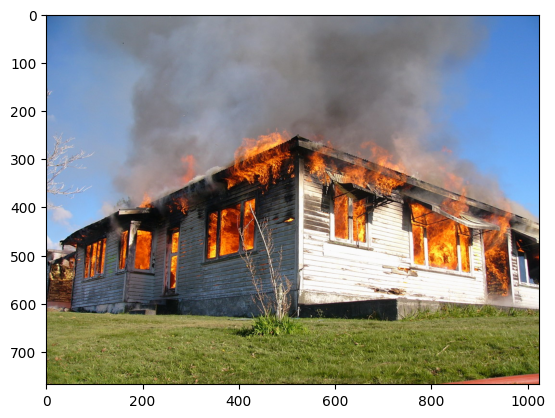

In [13]:
for f in fire_list[15:16]:
  img = cv2.imread(f)[...,::-1]
  plt.imshow(img)
  plt.show()

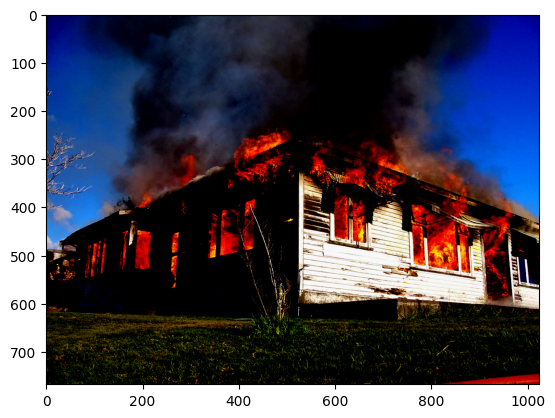

Predicted: [('n09472597', 'volcano', 0.005898864), ('n02793495', 'barn', 0.0053151874), ('n09288635', 'geyser', 0.0047276015)]


In [43]:
x = (2*(img[None,...]/255)-1).astype("float32")
plt.imshow(x[0])
plt.show()
preds = model.predict(x, verbose=False)
# Decodificar as previsões
print('Predicted:', decode_predictions(preds, top=3)[0])

In [39]:
#preds = model.predict(preprocess_input(img)[None,...], verbose=False)
#print('Predicted:', decode_predictions(preds, top=3)[0])

In [41]:
len(fire_list), len(nonfire_list)

(110, 541)

In [44]:
import albumentations as A

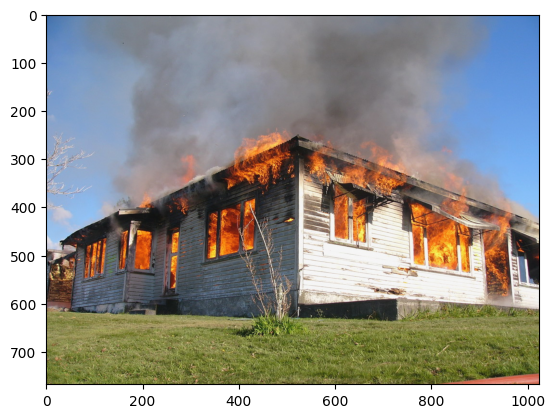

In [57]:
plt.imshow(A.RandomBrightnessContrast(p=1)(image=img)["image"])

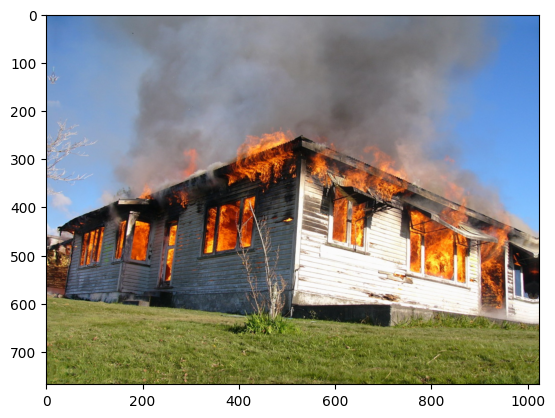

In [60]:
plt.imshow(A.Rotate(p=1)(image=img)["image"])